# Instructions


- Step 1: plot a frequency channel
- Step 2: fit a gaussian to this channel
- Step 3: plot out the fit and the data
- Step 4: select two frequency channels and fit gaussians
- Step 5: Use this to calculate the dispersion measure
- Step 6: Check your dispersion measure online
- Step 7: Dedisperse the data using this dispersion measure

# Setup

In [ ]:
import numpy as np
#from matplotlib import pylab as plt
from scipy.optimize import curve_fit
%pylab inline


file='J0738-4042.20180107.dat'

nchan=512
nbin=512
P_ms = 374
cfreq = 1283.895508
puls='J0738-4042'

# Effect of the ISM on pulsar signals

As the pulsar signal passes through the ionized medium of the interstellar medium (ISM) it is affected in a number of ways (dispersion, Faraday rotation, scintillation and scattering). In this tutorials we are going to explore aspects of the frequency dispersion. 


Pulses of electromagnetic radiation travelling through the ISM experience a delay dependent on the frequency of the radiation.




The dispersion measure (usually expressed as $ \rm cm^{-3}\:\rm pc$) is
\begin{equation}
\rm DM =  \int_0^L n_{e} \: dl
\end{equation} 


The dispersive delay, in seconds, of a pulse observed at frequency $\nu$, in MHz, is 
\begin{equation}
t = 4.149\times10^3 \biggl(DM\biggr) \biggl(\frac{1}{\nu}\biggr)^{2}
\end{equation}

The delay, $\Delta t$, in seconds, between the arrival times of pulses at frequencies, $\nu_{lo}$ and $\nu_{hi}$ is given by
\begin{equation}
\Delta t = 4.149\times10^3 \biggl(DM\biggr) \biggl[\frac{1}{\nu_{lo}^{2}}-\frac{1}{\nu_{hi}^{2}}\biggr]
\end{equation}

where $\nu_{lo}$ and $\nu_{hi}$ are in MHz.



If a receiver has a bandwidth B (MHz) centred on a frequency $\nu$ then the pulse will be smeared by an amount
\begin{equation}
\biggl(\frac {\bigtriangleup t}{\rm secs} \biggr) = 8.3 \times 10^{3} \biggl(\frac{\rm DM} {\rm pc~cm^{-3}}\biggr) \biggl(\frac{\nu} {\rm MHz}\biggr)^{-3} \biggl(\frac{B} {\rm MHz}\biggr)
\label{dispersion} 
\end{equation} 

# MeerKAT observation of J0738-4042
The data files contains a folded observation of the pulsar, J0738-4042 using MeerKAT.

There are 512 frequency channels and 512 phase bins.



Each line consists of three values

ichan, ibin, value

where ichan is the frequency channel, ibin is the bin number and value is the signal level.


## Read data into an array


In [ ]:
DataFile = file

f=open(DataFile,'r')

Data=np.zeros((nchan,nbin),dtype=float)

for line in f:
    columns=line.split()
    Data[int(columns[0]),int(columns[1])]=columns[2]

    
T=np.linspace(0,P_ms,nbin)
freq=np.linspace(-428,428,nchan)+cfreq
chan=np.linspace(0,nchan-1,nchan)

In [ ]:
plt.figure(figsize=(18,10))
ax1=plt.gca()

ax2 = ax1.twinx()
ax1.pcolormesh(T,freq,Data)
ax2.pcolormesh(T,chan,Data)
ax1.set_xlabel('time / [ms]')
ax1.set_ylabel('Freq / [mHz]')
ax1.set_title('Freq vs time')
ax2.set_ylabel('Channel')


## 1. Plot a frequency channel
Plot a single frequency channel as a function of time

Choose a frequency channel FChan

In [ ]:
figure=plt.figure(figsize=(15,10))

# select a frequency channel to plot
FChan =
plt.title("Pulsar profiles")
plt.xlabel("Time / ms]")
plt.ylabel("Signal")

Profile = Data[FChan,:]

# subtract a baseline
Profile = Profile - np.mean(Profile)

flabel="%.2f MHz" %freq[FChan]
plt.plot(T,Profile,'g.',label=flabel)
plt.legend()

## 2. Fit a gaussian profile

Fit a Gaussian to this profile to determine the position of the pulse peak

In [ ]:
def gauss(x, *p):
        A, x0, sigma,base = p
        return base+A*np.exp(-(x-x0)**2/(2.*sigma**2))

In [ ]:
# make an initial guess

A1 =                   # amplitude
x0 =                     # position
sigma =                   # gaussian width
base=

init=[A1,x0,sigma,base]

coeff,var=curve_fit(gauss,T,Profile,p0=init)

print ("Amplitude = %.2f" % coeff[0])
print ("Time = %.2f" %coeff[1])
print ("Sigma = %.2f"%coeff[2])
print ("base = %.2f" %coeff[3])

## 3. Plot out the fit and the profile

In [ ]:
figure=plt.figure(figsize=(15,10))

plt.title("Pulsar profiles")
plt.ylabel("Time / [ms]")
plt.xlabel("Signal")


fit=gauss(T,*coeff)
flabel="%.2f MHz" %freq[FChan]
plt.plot(T,Profile,'b.',label = "Data " + flabel)
plt.plot(T,fit,'r',label = "Fit")

plt.legend()



## 4 Now use two widely separated profiles

- Fit gaussians to both profiles
- calculate the difference in arrival times between the two profiles
- calculate the frequency for each channel
- find the dispersion measure

In [ ]:
figure=plt.figure(figsize=(15,10))
# choose two channels 
FChanLo = 
FChanHi = 
plt.title("Pulsar profiles")
plt.xlabel("Time / [ms]")
plt.ylabel("Signal")

ProfileLo = Data[FChanLo,:]
ProfileLo = ProfileLo - np.mean(ProfileLo)
ProfileHi = Data[FChanHi,:]
ProfileHi = ProfileHi - np.mean(ProfileHi)
# Plot the two profiles

flabel1="%.2f MHz" %freq[FChanLo]
flabel2="%.2f MHz" %freq[FChanHi]
plt.plot(T,ProfileLo,'g',label="lo " + flabel1)
plt.plot(T,ProfileHi,'b',label="hi " + flabel2)

plt.grid()
plt.legend()


Now fit a gaussian to each profile to find the centre of the profile. 

Use this to calculate the delay between the profiles and hence the dispersion measure for the pulsar


### Profile 1 - low frequency - green

In [ ]:
# make an initial guess

x0 =                    # position
A1 =                 # amplitude
sigma =                   # gaussian width
base=

p0=[A1,x0,sigma,base]

coeffLo,var=curve_fit(gauss,T,ProfileLo,p0=p0)

print ("Time = %.2f" %coeffLo[1])
print ("Amplitude = %.2f" % coeffLo[0])
print ("Sigma = %.2f"%coeffLo[2])
print ("base = %.2f" %coeffLo[3])

tLo = coeffLo[1]


### Profile2 high frequency

In [ ]:
# Profile 2
# make an initial guess

# make an initial guess

x0 =                 # position
A1 =                  # amplitude
sigma =                  # gaussian width
base=

p0=[A1,x0,sigma,base]

coeffHi,var=curve_fit(gauss,T,ProfileHi,p0=p0)

print ("Time = %.2f" %coeffHi[1])
print ("Amplitude = %.2f" % coeffHi[0])
print ("Sigma = %.2f"%coeffHi[2])
print ("base = %.2f" %coeffHi[3])

tHi = coeffHi[1]

In [ ]:
# Plot profiles and fits together

figure=plt.figure(figsize=(15,10))

plt.title("profiles")
plt.xlabel("Time / [ms]")
plt.ylabel("Signal")

# Plot the two profiles

plt.plot(T,ProfileLo,'g.',label=flabel1)
plt.plot(T,ProfileHi,'b.',label=flabel2)
fitLo=gauss(T,*coeffLo)
fitHi=gauss(T,*coeffHi)
plt.plot(T,fitLo,'g')
plt.plot(T,fitHi,'b')
plt.grid()
#plt.xlim(40,70)
plt.legend()


### 5 Calculate the dispersion measure for the pulsar



The delay, $\Delta t$, in seconds, between the arrival times of pulses at frequencies, $\nu_{lo}$ and $\nu_{hi}$ is given by
\begin{equation}
\Delta t = 4.149\times10^3 \biggl(DM\biggr) \biggl[\frac{1}{\nu_{lo}^{2}}-\frac{1}{\nu_{hi}^{2}}\biggr]
\end{equation}

where $\nu_{lo}$ and $\nu_{hi}$ are in MHz.

In [ ]:
const = 4149

fLo = freq[FChanLo]                         # frequency of Profile1
fHi = freq[FChanHi]                       # frequency of Profile2


dt =  tLo - tHi                        # delay due to dispersion

# calculate the DM from dt and the channel frequencies

print ("dt = %.4f" %dt)
print ("DM = %.2f" %DM)


## Step 6: Check your dispersion measure online

Check the dispersion measure you have found using the ATNF pulsar catalogue

https://www.atnf.csiro.au/research/pulsar/psrcat/

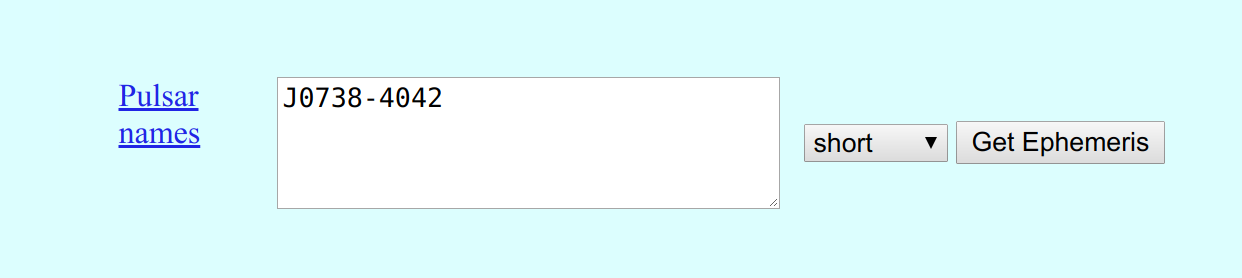

## Step 7: Use your dispersion measure to dedisperse the data

We are now going to incoherently dedisperse the data.

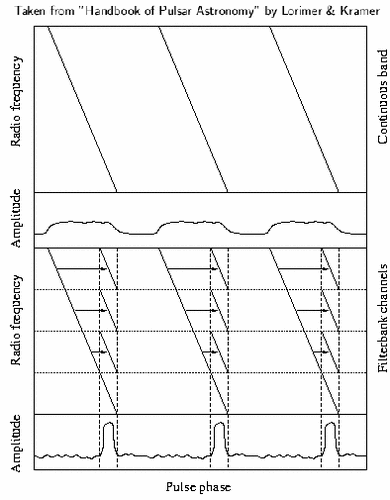
I have written a function to rotate the array by nbins.

For each chan in data:
    - get Profile
    - calculate the delay relative to centre frequency
    - calculate how many bins this is
    - rotate the profile by the number of bins

In [ ]:
# This routine rotates an array by nbins
def rotate_array(arr, nbins):
    return [arr[(nbins + i) % len(arr)] for i in range(len(arr))]

In [ ]:
# dedisperse the array to a centre frequency of 1284

# make a new array to hold the dedispersed profile
Dedispersed=np.zeros((nbin,nchan),dtype=float)

cfreq=1284

# for each frequency channel
for chan in range(len(Data[:,0])):
    
    # get the profile
    Profile=Data[chan,:]
    # get the frequency of this channel
    f=freq[chan]

    # calculate the delay relative to the central frequency
    
    shift 

    # how many bins is this

    # rotate this profile by the number of bins
    
    Profile2=rotate_array(Profile,bins)
    
    Dedispersed[chan,:]=Profile2

pcolormesh(T,freq,Dedispersed)
colorbar(); xlabel('time / [ms]'); ylabel('Freq'); title('Colourmap of');



